# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

crime_df = pd.read_csv("crime_data.csv")
crime_df.head()

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_75960/3877487157.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<Axes: >

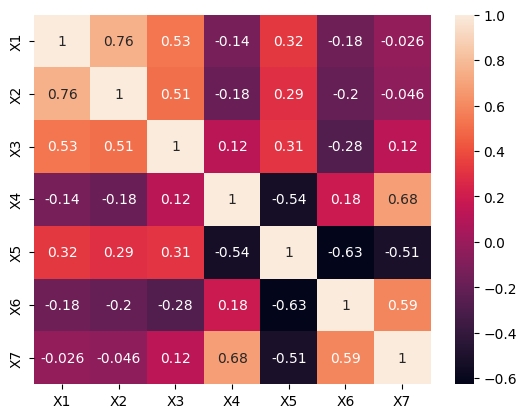

In [2]:
# for multiple linear regression (and other models) we need to use
# variables that are as uncorrelated with each other as possible in our equation 
correlation = crime_df.corr()
sns.heatmap(correlation, annot=True)

In [4]:
X = crime_df[['X2','X5']]
y = crime_df['X1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [5]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = regression.predict(X_test)
y_pred

array([1150.14172271,  480.45104191,  818.19106585, 1227.55813262,
        793.59725046,  412.11636809,  952.72799954,  460.13293182,
        691.73054259,  632.98594097,  889.21046849,  563.51330147,
       2349.69377312,  943.34788205, 1017.92493373])

In [7]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

0.40491214090185157

In [8]:
regression.coef_

array([0.53032549, 5.18172689])

In [9]:
# What is the equation for the model?
# x1 = 0.53*x2 + 5.18*x5

# OLS Regression

OLS (ordinary least squares) regression is a type of linear regression that lets
you handle interactions as well as features that dont have interactions. With OLS
regression you can incorporate features that are correlated with each other. 

In [11]:
# pip3 install statsmodels
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
diabetes_vs_glucose = ols("Outcome ~ Glucose", data=diabetes_df).fit()
print(diabetes_vs_glucose.params)
intercept, slope = diabetes_vs_glucose.params
# outcome = -0.492 + .0069*glucose

Intercept   -0.492495
Glucose      0.006960
dtype: float64


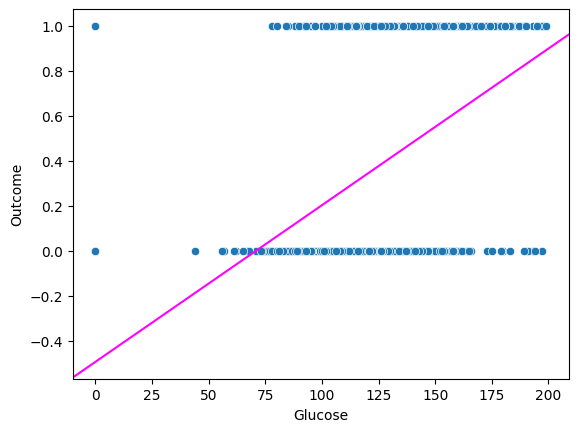

In [16]:
sns.scatterplot(x='Glucose',
                y='Outcome',
                data=diabetes_df)
plt.axline(xy1=(0,intercept), slope=slope, color='magenta')

In [17]:
# OLS regression is NOT the answer for modeling this dataset
# because the outcomes are binary and OLS works best when we have a gradient 
# of outcomes were trying to predict (continuous data)
# BUT we can use logistic regression to predict binary outcomes

In [18]:
#these are just example of how the code works
# the outcomes are meaningless
# no interaction - low or no correlation between params used to predict outcome
age_gl_no_int = ols('Outcome ~ Age + Glucose', data= diabetes_df).fit()
print(age_gl_no_int.params)
# Outcome = -.6 + 0.005*Age + 0.006*Glucose

Intercept   -0.600748
Age          0.005030
Glucose      0.006473
dtype: float64


In [19]:
# with interaction -  there is correlation between params used to predict outcome
age_gl_int = ols('Outcome ~ Age*Glucose', data= diabetes_df).fit()
print(age_gl_int.params)
# Outcome = -.91 + 0.01*Age + .0089*Glucose - .00072*Age*Glucose

Intercept     -0.905058
Age            0.014172
Glucose        0.008923
Age:Glucose   -0.000072
dtype: float64
